https://www.kaggle.com/ollmer/labels-spectrograms-exploration

In [1]:
import os
from pathlib import Path
from subprocess import check_output

import numpy as np
import pandas as pd
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print(os.listdir('D:\일학습과제2018\파이썬'))
print(os.listdir('D:/일학습과제2018/파이썬/train/train'))
folders = os.listdir("D:/일학습과제2018/파이썬/train/train/audio")
print(folders)

['Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf', 'test', 'test.7z', 'train', 'train.7z']
['audio', 'LICENSE', 'README.md', 'test', 'testing_list.txt', 'test_bak', 'validation_list.txt']
['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


In [3]:
train_audio_path = 'D:/일학습과제2018/파이썬/train/train/audio'
train_labels = os.listdir(train_audio_path)
print(f'Number of labels: {len(train_labels)}')

wavs = []
labels = []
for label in train_labels:
    if label == '_background_noise_':
        continue
    files = os.listdir(train_audio_path + '/' + label)
    for f in files:
        if not f.endswith('wav'):
            continue
        wavs.append(f)
        labels.append(label)
        
print(len(wavs), len(labels))
        
train = pd.DataFrame({'file':wavs, 'label':labels})
train.info()

Number of labels: 31
64721 64721
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64721 entries, 0 to 64720
Data columns (total 2 columns):
file     64721 non-null object
label    64721 non-null object
dtypes: object(2)
memory usage: 1011.3+ KB


### Labels

['bed' 'bird' 'cat' 'dog' 'down' 'eight' 'five' 'four' 'go' 'happy'
 'house' 'left' 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven'
 'sheila' 'six' 'stop' 'three' 'tree' 'two' 'up' 'wow' 'yes' 'zero']


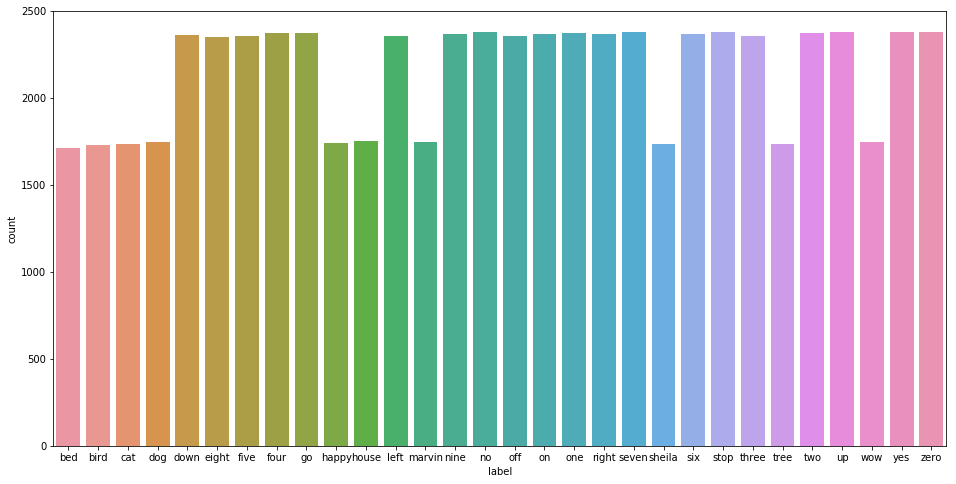

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(ax=ax, x="label", data=train)
print(train.label.unique())

### Spectrograms

In [5]:
def spectrogram(file, label):
    eps=1e-10
    sample_rate, samples = wavfile.read(str(train_audio_path) + '/' + label + '/' + file)
    frequencies, times, spectrogram = signal.stft(samples, sample_rate, nperseg = sample_rate/50, noverlap = sample_rate/75)
    return np.log(np.abs(spectrogram).T+eps)

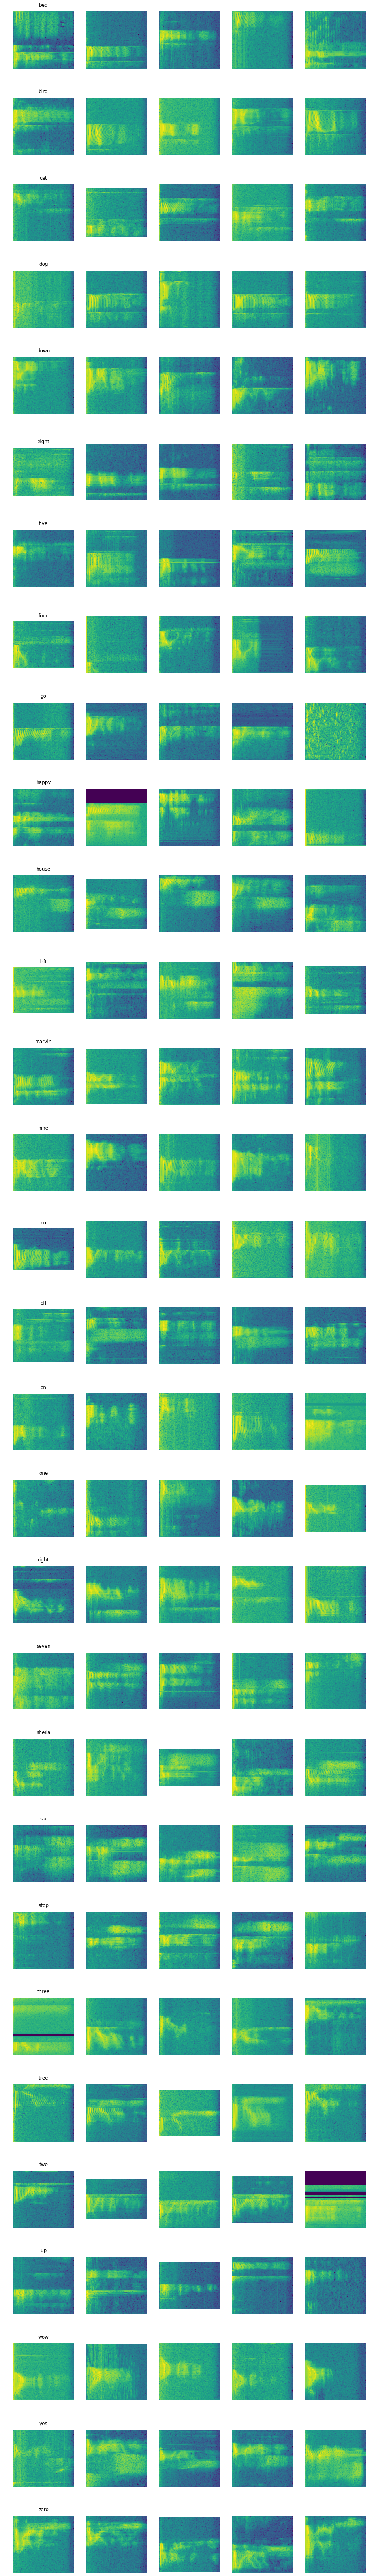

In [6]:
num_samples = 5
labels = train.label.unique()
fig, axes = plt.subplots(len(labels), num_samples, figsize = (16, len(labels)*4))
for i, label in enumerate(labels):
    files = train[train.label==label].file.sample(num_samples)
    axes[i][0].set_title(label)
    for j, file in enumerate(files):
        specgram = spectrogram(file, label)
        axes[i][j].axis('off')
        axes[i][j].matshow(specgram)